
# Exploración y visualización de datos con Pyspark

Para este ejemplo usaremos The MovieLens 100k dataset.

In [11]:
user_data = sc.textFile('/Users/user/GitHub/pyspark_exercises/ml-100k/u.user')
user_data.first()

u'1|24|M|technician|85711'

## -Aunque tambien lo hubieramos podido hacer con pandas-

Solo un pequeño parentesis de como podemos explorar los datos de forma muy eficiente con pandas:


In [12]:
import pandas as pd
df = pd.read_csv('/Users/user/GitHub/pyspark_exercises/ml-100k/u.user', sep='|',
                 #Le podemos colocar algunos headers para mayor comodidad:
                 names = ['Age','Gender', 'Occupation', 'ZIP_CODE'])
df.head()

,Age,Gender,Occupation,ZIP_CODE
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [13]:
#imprimimos las clases y el numero de instancias del dataset
print "\nImprimimos las clases y su contenido, podemos ver que en \
este dataset existen 943 instancias\
por atributo: \n\n", df.count()


Imprimimos las clases y su contenido, podemos ver que en este dataset existen 943 instanciaspor atributo: 

Age           943
Gender        943
Occupation    943
ZIP_CODE      943
dtype: int64


In [14]:
# Ahora podemos ver como se ven
print "\nImprimimos como se ve todo el corpus\n", df.head()


Imprimimos como se ve todo el corpus
   Age Gender  Occupation ZIP_CODE
1   24      M  technician    85711
2   53      F       other    94043
3   23      M      writer    32067
4   24      M  technician    43537
5   33      F       other    15213


In [15]:
print "\n Imprimimos el numero de opiniones por clase\n", \
df['Age'].value_counts()


 Imprimimos el numero de opiniones por clase
30    39
25    38
22    37
28    36
27    35
26    34
24    33
29    32
20    32
32    28
23    28
35    27
21    27
33    26
31    25
19    23
44    23
39    22
40    21
36    21
42    21
51    20
50    20
48    20
49    19
37    19
18    18
34    17
38    17
45    15
      ..
47    14
43    13
46    12
53    12
55    11
41    10
57     9
60     9
52     6
56     6
15     6
13     5
16     5
54     4
63     3
14     3
65     3
70     3
61     3
59     3
58     3
64     2
68     2
69     2
62     2
11     1
10     1
73     1
66     1
7      1
dtype: int64


In [16]:
print "\nImprimimos los tipos de ocupaciones asi como el numero de instancias por ocupacion\
(cuantas ocupaciones)\n", \
    df['Occupation'].value_counts()


Imprimimos los tipos de ocupaciones asi como el numero de instancias por ocupacion(cuantas ocupaciones)
student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
salesman          12
lawyer            12
none               9
homemaker          7
doctor             7
dtype: int64


In [17]:
#Describimos el dataset:
print "\n Imprimimos la descripcion del dataset\n", df.describe()


 Imprimimos la descripcion del dataset
              Age
count  943.000000
mean    34.051962
std     12.192740
min      7.000000
25%     25.000000
50%     31.000000
75%     43.000000
max     73.000000


In [18]:
print "\nImprimimos los generos del dataset (cuantos hombres y mujeres hay)\n", \
    df['Gender'].value_counts()


Imprimimos los generos del dataset (cuantos hombres y mujeres hay)
M    670
F    273
dtype: int64


In [19]:
print "\nImprimimos los cps del dataset\n", \
    df['ZIP_CODE'].value_counts()


Imprimimos los cps del dataset
55414    9
55105    6
20009    5
10003    5
55337    5
55454    4
55408    4
27514    4
14216    3
61801    3
97301    3
60201    3
55108    3
02215    3
10021    3
55106    3
61820    3
55113    3
55409    3
55104    3
62901    3
11217    3
48103    3
22902    3
94043    3
80525    3
22903    3
63108    3
21114    2
60630    2
        ..
97229    1
29301    1
R3T5K    1
78602    1
45439    1
80919    1
95032    1
28018    1
15017    1
95129    1
92688    1
10314    1
17110    1
12866    1
30002    1
20723    1
48446    1
17331    1
95110    1
30350    1
52241    1
90804    1
52246    1
52245    1
08034    1
17961    1
27511    1
27510    1
97232    1
14853    1
dtype: int64


## -Ahora regresando a pyspark:-

In [20]:
user_fields = user_data.map(lambda line :
                           line.split('|'))
user_fields

PythonRDD[3] at RDD at PythonRDD.scala:43

In [21]:
num_users = user_fields.map(lambda fields:
                            #le damos la posicion con el [0]
                            fields[0]).distinct().count()

num_genders = user_fields.map(lambda fields:
                             fields[2]).distinct().count()

num_ocupations = user_fields.map(lambda fields:
                                fields[3]).distinct().count()

num_zipcodes = user_fields.map(lambda fields:
                              fields[4]).distinct().count()

print 'Users: %d, genders:%d, occupations:%d, Codigos postales:%d'%(
    num_users, num_genders, num_ocupations, num_zipcodes)


Users: 943, genders:2, occupations:21, Codigos postales:795


Populating the interactive namespace from numpy and matplotlib


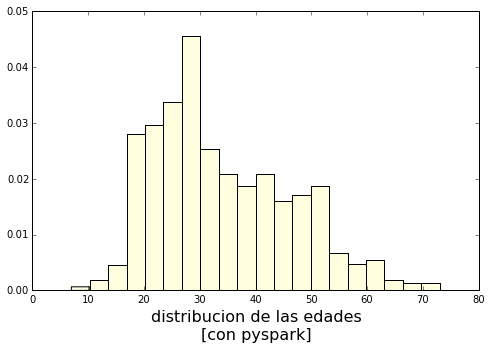

In [58]:
get_ipython().magic(u'pylab inline')
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

ages = user_fields.map(lambda x: int(x[1])).collect()
#podemos imprimir para verificar:
#print sorted(ages)
hist(ages, bins=20, color='lightyellow', normed=True)
fig = matplotlib.pyplot.gcf()
#mover tamaño
fig.set_size_inches(8,5)
plt.xlabel('distribucion de las edades\n[con pyspark]', fontsize=16)

In [ ]:
#ahora contaremos por genero
count_by_gender = 

Populating the interactive namespace from numpy and matplotlib


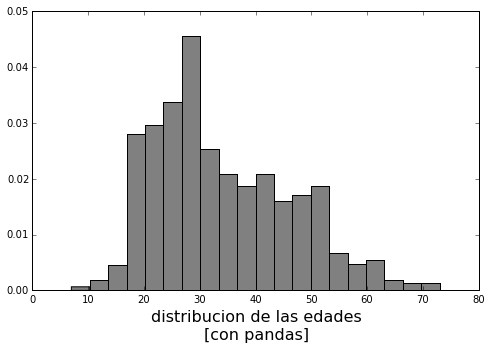

In [57]:
get_ipython().magic(u'pylab inline')
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

#df['Age'].value_counts()
#ages = user_fields.map(lambda x: int(x[1])).collect()
ages = [df['Age']]
#print ages
hist(ages, bins=20, color='gray', normed=True)
fig = matplotlib.pyplot.gcf()
#mover tamaño
fig.set_size_inches(8,5)
plt.xlabel('distribucion de las edades\n[con pandas]', fontsize=16)

In [65]:
sparkDF = sqlContext.read.format('com.databricks.spark.csv').lo
('/Users/user/GitHub/pyspark_exercises/ml-100k/u.user')
